# 1. Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,LabelEncoder
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
warnings.filterwarnings('ignore')
import pickle

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.shape

(907, 27)

In [5]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# DATA PRE-PROCESSING

In [6]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

many of the features do have null values present

In [7]:
data.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

removing all columns with 100% null values

In [8]:
data.shape

(907, 21)

In [9]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


 country,country_long have 0% variance and name,gppd_idnr,url,owner,source,geolocation_source,generation_data_source,commissioning_year,year_of_capacity_data,longitude,latitude have no relation with target so we can remove them

In [10]:
data.drop(['country','country_long','name','gppd_idnr','url','owner','source','geolocation_source','generation_data_source','commissioning_year','year_of_capacity_data','latitude','longitude'],axis=1,inplace=True)

In [11]:
data.shape

(907, 8)

In [12]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [13]:
data.isna().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# FILLING NULL VALUES

In [14]:
data['other_fuel1'].fillna('None',inplace=True)

In [15]:
imp = KNNImputer()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          907 non-null    object 
 3   generation_gwh_2014  398 non-null    float64
 4   generation_gwh_2015  422 non-null    float64
 5   generation_gwh_2016  434 non-null    float64
 6   generation_gwh_2017  440 non-null    float64
 7   generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(2)
memory usage: 56.8+ KB


In [17]:
cat_data = data.select_dtypes('object').columns.tolist()

In [18]:
cont_data = data.select_dtypes('float64').columns.tolist()

In [19]:
cat_data

['primary_fuel', 'other_fuel1']

In [20]:
cont_data

['capacity_mw',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [21]:
cont_data = cont_data[1:]

In [22]:
cont_data

['generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [23]:
data[cont_data] = imp.fit_transform(X=data[cont_data],y=data['capacity_mw'])

In [24]:
data.isna().sum()

capacity_mw            0
primary_fuel           0
other_fuel1            0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# EDA

In [25]:
for i in data[cat_data]:
    print(f"{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n")

8
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

4
None            709
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64



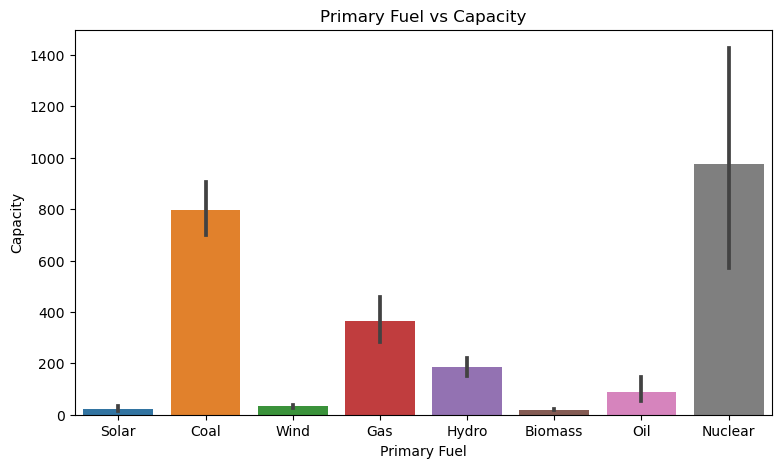

In [26]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['primary_fuel'],y = data['capacity_mw'])

plt.title('Primary Fuel vs Capacity')

plt.xlabel('Primary Fuel')

plt.ylabel('Capacity')

plt.show()

Nuclear Plants and coal plants have more capacity compared to others

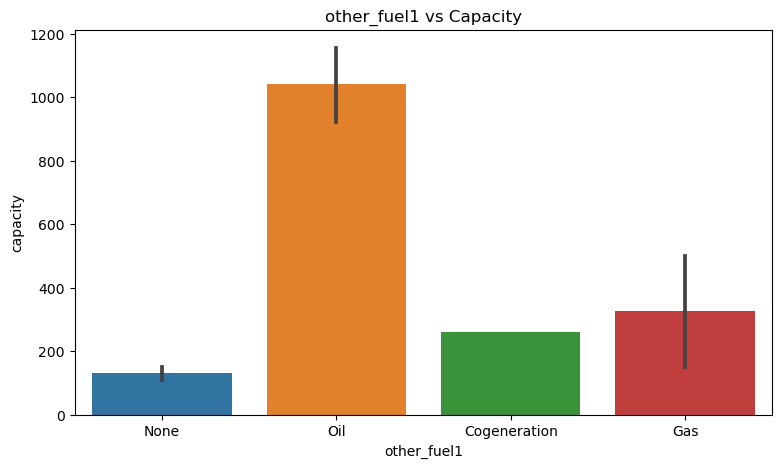

In [27]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['other_fuel1'],y = data['capacity_mw'])

plt.title('other_fuel1 vs Capacity')

plt.xlabel('other_fuel1')

plt.ylabel('capacity')

plt.show()

oil has the highest capacity rate compared to other fuels in other_fuel_1 section

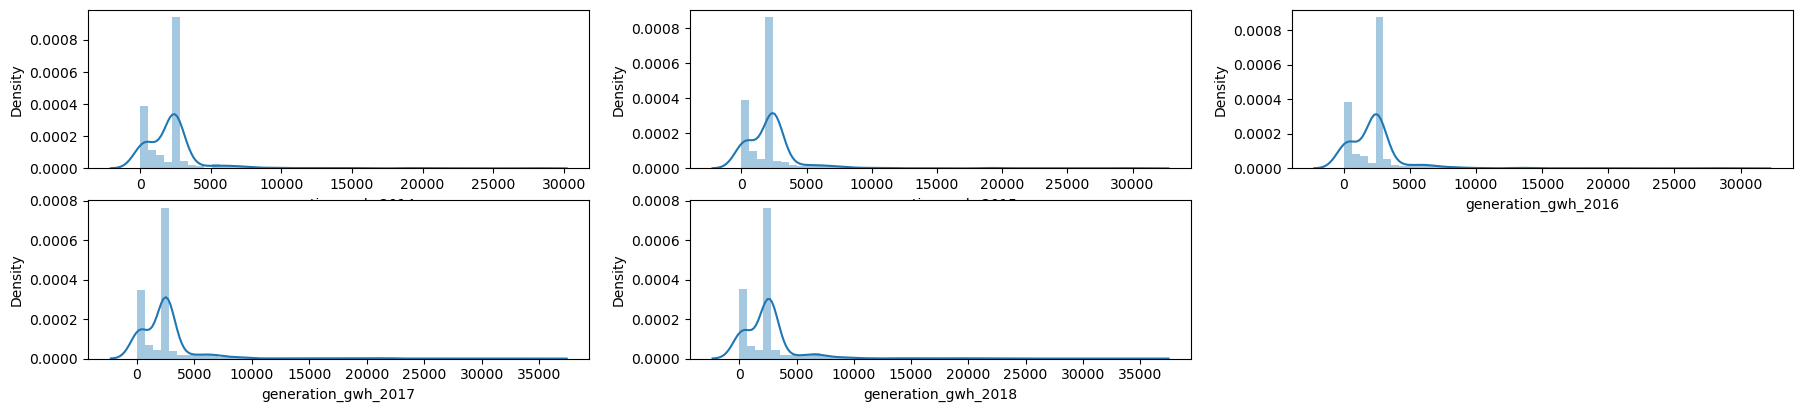

In [28]:
plt.figure(figsize=(22,7))

plotnumber =1

for i in data[cont_data]:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

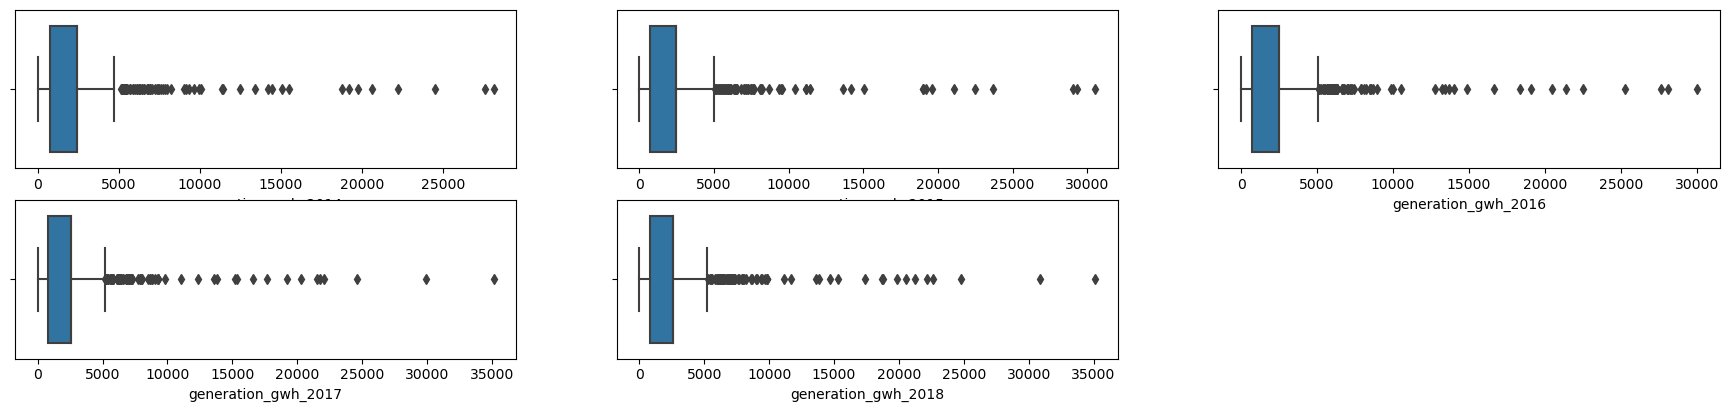

In [29]:
plt.figure(figsize=(22,7))

plotnumber =1

for i in data[cont_data]:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [30]:
z = zscore(data[cont_data])

In [31]:
data = data[(z<3).all(axis=1)]

In [32]:
data.shape

(890, 8)

In [33]:
dataloss = (907-890)/907

In [34]:
dataloss

0.018743109151047408

# Feature Selection

In [35]:
data.shape

(890, 8)

we have 7 features and 1 label

In [36]:
data.corr()['capacity_mw'].sort_values()

generation_gwh_2014    0.363442
generation_gwh_2015    0.408332
generation_gwh_2016    0.476458
generation_gwh_2017    0.533819
generation_gwh_2018    0.565730
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

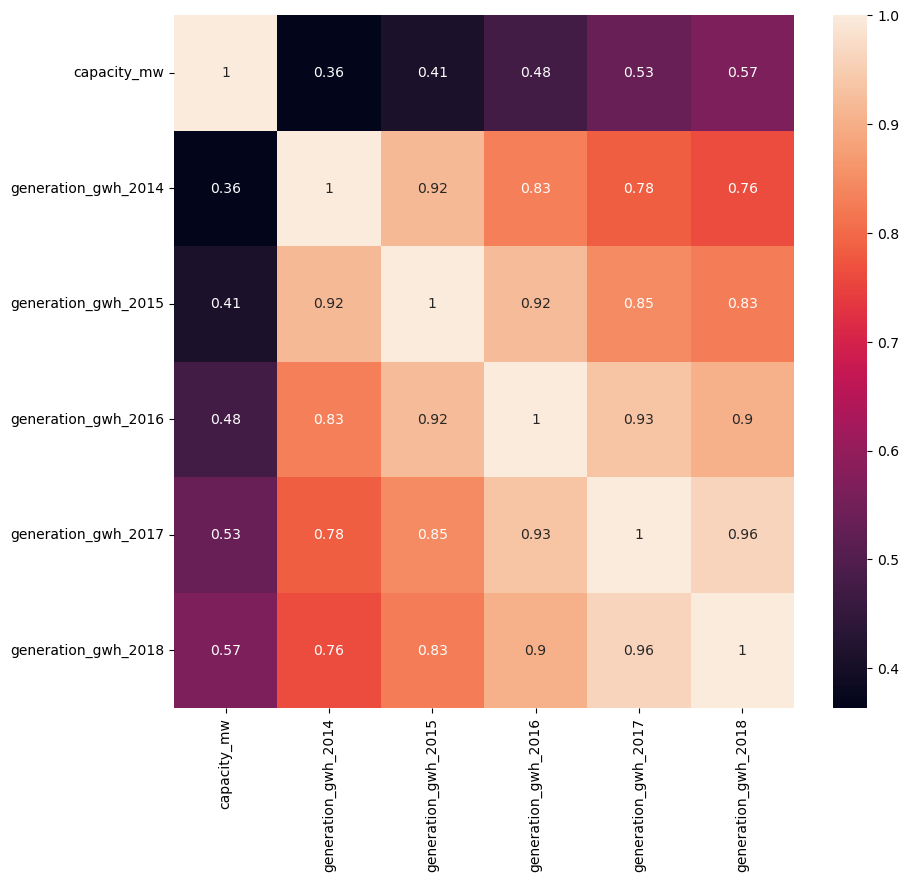

In [37]:
plt.figure(figsize=(10,9))

sns.heatmap(data.corr(),annot=True)

plt.show()

# SCALING

In [38]:
#ss = StandardScaler()

In [39]:
#mm = MinMaxScaler()

In [40]:
pt = PowerTransformer()

In [41]:
xx = pd.get_dummies(data[cat_data])

In [42]:
data = pd.concat([data,xx],axis=1)

In [43]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_None,other_fuel1_Oil
0,2.5,Solar,None,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0,0,0,0,0,0,1,0,0,0,1,0
1,98.0,Coal,None,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0,1,0,0,0,0,0,0,0,0,1,0
2,39.2,Wind,None,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0,0,0,0,0,0,0,1,0,0,1,0
3,135.0,Gas,None,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1,0,0,0,0,0,0,0,1,0
4,1800.0,Coal,Oil,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,1,0,0,0,0,0,0,0,0,0,1


In [44]:
data.drop(cat_data,axis=1,inplace=True)

In [45]:
x = data.drop('capacity_mw',axis=1)

y = data['capacity_mw']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=9)

In [47]:
x_train[cont_data] = pt.fit_transform(x_train[cont_data])

In [48]:
x_test[cont_data] = pt.transform(x_test[cont_data])

In [49]:
#x_train[cont_data] = ss.fit_transform(x_train[cont_data])

In [50]:
#x_test[cont_data] = ss.transform(x_test[cont_data])

In [51]:
#x_train[cont_data] = mm.fit_transform(x_train[cont_data])

In [52]:
#x_test[cont_data] = mm.transform(x_test[cont_data])

In [53]:
x_train.head()

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_None,other_fuel1_Oil
510,0.499784,0.763587,0.713769,0.756135,0.530450,0,0,0,0,1,0,0,0,0,0,1,0
154,0.441313,0.441926,0.437291,0.424094,0.421450,0,0,0,0,0,0,1,0,0,0,1,0
533,-1.611113,-0.780455,-0.384906,-0.042970,-0.097179,0,1,0,0,0,0,0,0,0,0,0,1
716,0.441313,0.441926,0.437291,0.424094,0.421450,1,0,0,0,0,0,0,0,0,0,1,0
91,-1.699184,-1.673661,-1.599668,-1.605434,-1.629450,0,0,0,1,0,0,0,0,0,0,1,0


# LR

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
pred1 = lr.predict(x_train)

In [57]:
pred2 = lr.predict(x_test)

In [58]:
print(f'Train Score:{r2_score(y_train,pred1)}')

Train Score:0.6040851863559423


In [59]:
print(f'Test Score:{r2_score(y_test,pred2)}')

Test Score:0.665120206293714


In [60]:
a1 = r2_score(y_train,pred1)

In [61]:
a2 = r2_score(y_test,pred2)

In [62]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.6248878668707982

# Lasso

In [63]:
ls = Lasso()

In [64]:
ls.fit(x_train,y_train)

Lasso()

In [65]:
pred3= ls.predict(x_train)

In [66]:
pred4 = ls.predict(x_test)

In [67]:
print(f'Train Score:{r2_score(y_train,pred3)}')

Train Score:0.6035508183013453


In [68]:
print(f'Test Score:{r2_score(y_test,pred4)}')

Test Score:0.6644449525195879


In [69]:
a4 = r2_score(y_train,pred3)

In [70]:
a5 = r2_score(y_test,pred4)

In [71]:
cv = cross_val_score(ls,x,y)

a6 = cv.mean()

a6

0.6217594309676822

# RIDGE

In [72]:
ri = Ridge()

In [73]:
ri.fit(x_train,y_train)

Ridge()

In [74]:
pred5 = ri.predict(x_train)

In [75]:
pred6 = ri.predict(x_test)

In [76]:
print(f'Train Score:{r2_score(y_train,pred5)}')

Train Score:0.6050325621907295


In [77]:
print(f'Test Score:{r2_score(y_test,pred6)}')

Test Score:0.6652380447615718


In [78]:
a7 = r2_score(y_train,pred5)

In [79]:
a8 = r2_score(y_test,pred6)

In [80]:
cv = cross_val_score(ri,x,y)

a9 = cv.mean()

a9

0.6257838701259144

# KNN

In [81]:
knn = KNeighborsRegressor()

In [82]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [83]:
pred7 = knn.predict(x_train)

In [84]:
pred8 = knn.predict(x_test)

In [85]:
print(f'Train Score:{r2_score(y_train,pred7)}')

Train Score:0.8430102851208907


In [86]:
print(f'Test Score:{r2_score(y_test,pred8)}')

Test Score:0.7297275714391069


In [87]:
a10 = r2_score(y_train,pred7)

In [88]:
a11 = r2_score(y_test,pred8)

In [89]:
cv = cross_val_score(knn,x,y)

a12 = cv.mean()

a12

0.7462515596083275

# DT

In [90]:
dt = DecisionTreeRegressor()

In [91]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [92]:
pred9 = dt.predict(x_train)

In [93]:
pred10 = dt.predict(x_test)

In [94]:
print(f'Train Score:{r2_score(y_train,pred9)}')

Train Score:0.9825575372638219


In [95]:
print(f'Test Score:{r2_score(y_test,pred10)}')

Test Score:0.6382539085408978


In [96]:
a13 = r2_score(y_train,pred9)

In [97]:
a14 = r2_score(y_test,pred10)

In [98]:
cv = cross_val_score(dt,x,y)

a15 = cv.mean()

a15

0.6161088777622101

# RF

In [99]:
rf = RandomForestRegressor()

In [100]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [101]:
pred11 = rf.predict(x_train)

In [102]:
pred12 = rf.predict(x_test)

In [103]:
print(f'Train Score:{r2_score(y_train,pred11)}')

Train Score:0.95555703157985


In [104]:
print(f'Test Score:{r2_score(y_test,pred12)}')

Test Score:0.7562063730387221


In [105]:
a16 = r2_score(y_train,pred11)

In [106]:
a17 = r2_score(y_test,pred12)

In [107]:
cv = cross_val_score(rf,x,y)

a18 = cv.mean()

a18

0.7640595498477375

# ADA

In [108]:
ada = AdaBoostRegressor()

In [109]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [110]:
pred13 = ada.predict(x_train)

In [111]:
pred14 = ada.predict(x_test)

In [112]:
print(f'Train Score:{r2_score(y_train,pred13)}')

Train Score:0.7489757643980275


In [113]:
print(f'Test Score:{r2_score(y_test,pred14)}')

Test Score:0.7082938666317568


In [114]:
a19 = r2_score(y_train,pred13)

In [115]:
a20 = r2_score(y_test,pred14)

In [116]:
cv = cross_val_score(ada,x,y)

a21 = cv.mean()

a21

0.5328927878333463

# GBDT

In [117]:
gb = GradientBoostingRegressor()

In [118]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [119]:
pred15 = gb.predict(x_train)

In [120]:
pred16 = gb.predict(x_test)

In [121]:
print(f'Train Score:{r2_score(y_train,pred15)}')

Train Score:0.9422259539082531


In [122]:
print(f'Test Score:{r2_score(y_test,pred16)}')

Test Score:0.7467207768833705


In [123]:
a22 = r2_score(y_train,pred15)

In [124]:
a23 = r2_score(y_test,pred16)

In [125]:
cv = cross_val_score(gb,x,y)

a24 = cv.mean()

a24

0.7396899000190921

# XGBOOST

In [126]:
xg = XGBRegressor()

In [127]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [128]:
pred17 = xg.predict(x_train)

In [129]:
pred18 = xg.predict(x_test)

In [130]:
print(f'Train Score:{r2_score(y_train,pred17)}')

Train Score:0.9825426525567444


In [131]:
print(f'Test Score:{r2_score(y_test,pred18)}')

Test Score:0.7171266108133754


In [132]:
a25 = r2_score(y_train,pred17)

In [133]:
a26 = r2_score(y_test,pred18)

In [134]:
cv = cross_val_score(xg,x,y)

a27 = cv.mean()

a27

0.7061954852596098

# SVM

In [135]:
svm = SVR()

In [136]:
svm.fit(x_train,y_train)

SVR()

In [137]:
pred19 = svm.predict(x_train)

In [138]:
pred20 = svm.predict(x_test)

In [139]:
print(f'Train Score:{r2_score(y_train,pred19)}')

Train Score:-0.12740178958337256


In [140]:
print(f'Test Score:{r2_score(y_test,pred20)}')

Test Score:-0.18860724813778895


In [141]:
a28 = r2_score(y_train,pred19)

In [142]:
a29 = r2_score(y_test,pred20)

In [143]:
cv = cross_val_score(svm,x,y)

a30 = cv.mean()

a30

-0.16661432415098712

In [144]:
test = []
train = []
cv = []

In [145]:
model = ['LR','LASSO','RIDGE','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [146]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

train.append(a25)
test.append(a26)
cv.append(a27)

train.append(a28)
test.append(a29)
cv.append(a30)

In [147]:
result = pd.DataFrame({"MODEL":model,"TRAIN RESULT":train,"TEST RESULT":test,"CV SCORE":cv})

In [148]:
result

,MODEL,TRAIN RESULT,TEST RESULT,CV SCORE
0,LR,0.604085,0.665120,0.624888
1,LASSO,0.603551,0.664445,0.621759
2,RIDGE,0.605033,0.665238,0.625784
3,KNN,0.843010,0.729728,0.746252
4,DT,0.982558,0.638254,0.616109
5,RF,0.955557,0.756206,0.764060
6,ADA,0.748976,0.708294,0.532893
7,GBDT,0.942226,0.746721,0.739690
8,XGBOOST,0.982543,0.717127,0.706195
9,SVM,-0.127402,-0.188607,-0.166614


KNN IS THE BEST MODEL BASED ON RESULT

# HYPER PARAMETER TUNUNG

In [149]:
knn = KNeighborsRegressor()

In [150]:
para = {'n_neighbors':[3,4,5,6],
       'weights':['uniform', 'distance'],
       'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
       'leaf_size':[25,30,35],
       'p':[1,2]}

In [151]:
gs = GridSearchCV(knn,para,n_jobs=-1)

In [152]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35], 'n_neighbors': [3, 4, 5, 6],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [153]:
gs.best_params_

{'algorithm': 'auto',
 'leaf_size': 25,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [154]:
gs.best_estimator_.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25)

In [155]:
trainpred = gs.best_estimator_.predict(x_train)

In [156]:
testpred = gs.best_estimator_.predict(x_test)

In [157]:
print(f'Train Score:{r2_score(y_train,trainpred)}')

Train Score:0.8430102851208907


In [158]:
print(f'Test Score:{r2_score(y_test,testpred)}')

Test Score:0.7297275714391069


In [159]:
mean_absolute_error(y_test,testpred)

131.0200146067416

In [160]:
mean_squared_error(y_test,testpred)

74990.12203716786

In [161]:
conclusion = pd.DataFrame({"ACTUAL":y_test,'PREDICTED':testpred})

In [162]:
conclusion

,ACTUAL,PREDICTED
773,3.0,29.4200
431,120.0,52.2000
271,420.0,456.4000
253,600.0,1040.0000
498,610.0,664.0000
...,...,...
107,750.0,1126.0000
596,234.0,123.8000
389,720.0,679.8000
3,135.0,259.2428


In [163]:
pickle.dump(gs.best_estimator_,open('global_power.pkl','wb'))

# 2.Classification

In [164]:
data = pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [165]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [166]:
data.shape

(907, 27)

In [167]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# DATA PRE-PROCESSING

In [168]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

many of the features do have null values present

In [169]:
data.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

removing all columns with 100% null values

In [170]:
data.shape

(907, 21)

In [171]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


 country,country_long have 0% variance and name,gppd_idnr,url,owner,source,geolocation_source,generation_data_source,commissioning_year,year_of_capacity_data,longitude,latitude have no relation with target so we can remove them

In [172]:
data.drop(['country','country_long','name','gppd_idnr','url','owner','source','geolocation_source','generation_data_source','commissioning_year','year_of_capacity_data','latitude','longitude'],axis=1,inplace=True)

In [173]:
data.shape

(907, 8)

In [174]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [175]:
data.isna().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# FILLING NULL VALUES

In [176]:
imp = KNNImputer()

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          198 non-null    object 
 3   generation_gwh_2014  398 non-null    float64
 4   generation_gwh_2015  422 non-null    float64
 5   generation_gwh_2016  434 non-null    float64
 6   generation_gwh_2017  440 non-null    float64
 7   generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(2)
memory usage: 56.8+ KB


In [178]:
cat_data = data.select_dtypes('object').columns.tolist()

In [179]:
cont_data = data.select_dtypes('float64').columns.tolist()

In [180]:
cat_data = cat_data[1:]

In [181]:
cat_data

['other_fuel1']

In [182]:
cont_data

['capacity_mw',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [183]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [184]:
#le = LabelEncoder()

In [185]:
#data['primary_fuel'] = le.fit_transform(data['primary_fuel'])

Dividing data into 2 main classes, 0-Natural Fuel,1-ArtificialFuel

In [186]:
data['primary_fuel'].replace({'Hydro':0,'Solar':0,'Wind':0,'Coal':1,'Gas':1,'Biomass':1,'Oil':1,'Nuclear':1},inplace=True)

In [187]:
data['primary_fuel'].value_counts()

0    501
1    406
Name: primary_fuel, dtype: int64

In [188]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,1,NaN,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,1,Oil,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [189]:
data[cont_data] = imp.fit_transform(X=data[cont_data],y=data['primary_fuel'])

In [190]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,0,NaN,58.113970,21.679060,15.127980,20.833310,71.914620
1,98.0,1,NaN,315.005060,184.721750,190.313650,206.987860,283.324260
2,39.2,0,NaN,156.241790,156.889687,135.213404,146.726680,175.462280
3,135.0,1,NaN,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,Oil,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [191]:
xx = pd.get_dummies(data[cat_data])

In [192]:
data = pd.concat([data,xx],axis=1)

In [193]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
0,2.5,0,NaN,58.113970,21.679060,15.127980,20.833310,71.914620,0,0,0
1,98.0,1,NaN,315.005060,184.721750,190.313650,206.987860,283.324260,0,0,0
2,39.2,0,NaN,156.241790,156.889687,135.213404,146.726680,175.462280,0,0,0
3,135.0,1,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,0
4,1800.0,1,Oil,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1


In [194]:
data.drop(cat_data,axis=1,inplace=True)

In [195]:
data.shape

(907, 10)

In [196]:
data.head()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
0,2.5,0,58.113970,21.679060,15.127980,20.833310,71.914620,0,0,0
1,98.0,1,315.005060,184.721750,190.313650,206.987860,283.324260,0,0,0
2,39.2,0,156.241790,156.889687,135.213404,146.726680,175.462280,0,0,0
3,135.0,1,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,0
4,1800.0,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1


# Scaling

In [197]:
pt = PowerTransformer()

In [198]:
x = data.drop('primary_fuel',axis=1)

In [199]:
y = data['primary_fuel']

In [200]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=80)

In [201]:
x_train[cont_data] = pt.fit_transform(x_train[cont_data])

In [202]:
x_test[cont_data] = pt.transform(x_test[cont_data])

In [203]:
x_train.head()

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
670,-1.251678,-0.682025,-0.854369,-0.899902,-0.815265,-0.566294,0,0,0
429,0.674746,-0.326724,-1.279990,0.215549,0.220832,-0.197401,0,0,0
874,-0.628492,-0.644075,-0.471230,-0.494865,-0.300654,-0.509968,0,0,0
261,0.859752,0.759984,0.748204,0.796962,0.830894,0.443337,0,0,0
877,1.039072,1.483419,1.352899,1.386085,1.314864,1.317338,0,0,1


# LR

In [204]:
lr = LogisticRegression()

In [205]:
lr.fit(x_train,y_train)

LogisticRegression()

In [206]:
pred1 = lr.predict(x_train)

In [207]:
pred2 = lr.predict(x_test)

In [209]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred1)}')

TRAINING ACCURACY: 0.7931034482758621


In [210]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred2)}')

TEST ACCURACY: 0.7527472527472527


In [214]:
a1 = accuracy_score(y_train,pred1)

In [215]:
a2 = accuracy_score(y_test,pred2)

In [211]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        99
           1       0.84      0.57      0.68        83

    accuracy                           0.75       182
   macro avg       0.78      0.74      0.74       182
weighted avg       0.77      0.75      0.74       182



In [212]:
print(confusion_matrix(y_test,pred2))

[[90  9]
 [36 47]]


In [213]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.7652115839961143

In [303]:
roc_auc_score(y_test,pred2)

0.7376779846659365

# KNN

In [216]:
knn = KNeighborsClassifier()

In [217]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [218]:
pred3 = knn.predict(x_train)

In [219]:
pred4 = knn.predict(x_test)

In [220]:
a4 = accuracy_score(y_train,pred3)

In [221]:
a5 = accuracy_score(y_test,pred4)

In [224]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred3)}')

TRAINING ACCURACY: 0.8303448275862069


In [225]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred4)}')

TEST ACCURACY: 0.7252747252747253


In [222]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        99
           1       0.70      0.69      0.70        83

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.73      0.72       182



In [223]:
print(confusion_matrix(y_test,pred2))

[[90  9]
 [36 47]]


In [226]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.7343694979054095

In [304]:
roc_auc_score(y_test,pred4)

0.7221613727637824

# DT

In [228]:
dt = DecisionTreeClassifier()

In [229]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [230]:
pred5 = dt.predict(x_train)

In [231]:
pred6 = dt.predict(x_test)

In [232]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred5)}')

TRAINING ACCURACY: 0.9420689655172414


In [233]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred6)}')

TEST ACCURACY: 0.7417582417582418


In [234]:
a7 = accuracy_score(y_train,pred5)

In [235]:
a8 = accuracy_score(y_test,pred6)

In [236]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.7872746038491896

In [237]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.72      0.70      0.71        83

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



In [238]:
print(confusion_matrix(y_test,pred6))

[[77 22]
 [25 58]]


In [305]:
roc_auc_score(y_test,pred6)

0.7382864792503346

# RF

In [239]:
rf = RandomForestClassifier()

In [240]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [241]:
pred7 = rf.predict(x_train)

In [242]:
pred8 = rf.predict(x_test)

In [243]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred7)}')

TRAINING ACCURACY: 0.9420689655172414


In [244]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred8)}')

TEST ACCURACY: 0.7362637362637363


In [246]:
a10 = accuracy_score(y_train,pred7)

In [247]:
a11 = accuracy_score(y_test,pred8)

In [248]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.7927144678525895

In [249]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.72      0.70      0.71        83

    accuracy                           0.74       182
   macro avg       0.73      0.73      0.73       182
weighted avg       0.74      0.74      0.74       182



In [250]:
print(confusion_matrix(y_test,pred8))

[[76 23]
 [25 58]]


In [306]:
roc_auc_score(y_test,pred8)

0.7332359741998298

# ADA

In [251]:
ada = AdaBoostClassifier()

In [252]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [253]:
pred9 = ada.predict(x_train)

In [254]:
pred10 = ada.predict(x_test)

In [255]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred9)}')

TRAINING ACCURACY: 0.856551724137931


In [256]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred10)}')

TEST ACCURACY: 0.7362637362637363


In [257]:
a13 = accuracy_score(y_train,pred9)

In [259]:
a14 = accuracy_score(y_test,pred10)

In [260]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.7883795762248802

In [261]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        99
           1       0.75      0.63      0.68        83

    accuracy                           0.74       182
   macro avg       0.74      0.73      0.73       182
weighted avg       0.74      0.74      0.73       182



In [262]:
print(confusion_matrix(y_test,pred10))

[[82 17]
 [31 52]]


In [307]:
roc_auc_score(y_test,pred10)

0.7273944261896069

# GBDT

In [263]:
gb = GradientBoostingClassifier()

In [264]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [265]:
pred11 = gb.predict(x_train)

In [266]:
pred12 = gb.predict(x_test)

In [267]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred11)}')

TRAINING ACCURACY: 0.8882758620689655


In [268]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred12)}')

TEST ACCURACY: 0.7197802197802198


In [269]:
a16 = accuracy_score(y_train,pred11)

In [270]:
a17 = accuracy_score(y_test,pred12)

In [271]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.7927994657276425

In [272]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        99
           1       0.72      0.63      0.67        83

    accuracy                           0.72       182
   macro avg       0.72      0.71      0.71       182
weighted avg       0.72      0.72      0.72       182



In [273]:
print(confusion_matrix(y_test,pred12))

[[79 20]
 [31 52]]


In [308]:
roc_auc_score(y_test,pred12)

0.7122429110380918

# XGBOOST

In [274]:
xg = XGBClassifier()

In [275]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [276]:
pred13 = xg.predict(x_train)

In [277]:
pred14 = xg.predict(x_test)

In [278]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred13)}')

TRAINING ACCURACY: 0.9406896551724138


In [279]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred14)}')

TEST ACCURACY: 0.7197802197802198


In [280]:
a19 = accuracy_score(y_train,pred13)

In [281]:
a20 = accuracy_score(y_test,pred14)

In [282]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.7795762248800923

In [283]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.68      0.72      0.70        83

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182



In [284]:
print(confusion_matrix(y_test,pred14))

[[71 28]
 [23 60]]


In [309]:
roc_auc_score(y_test,pred14)

0.7200316417183887

# SVM

In [285]:
svm = SVC()

In [286]:
svm.fit(x_train,y_train)

SVC()

In [289]:
pred15 = svm.predict(x_train)

In [288]:
pred16 = svm.predict(x_test)

In [290]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred15)}')

TRAINING ACCURACY: 0.8041379310344827


In [291]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred16)}')

TEST ACCURACY: 0.7747252747252747


In [292]:
a22 = accuracy_score(y_train,pred15)

In [293]:
a23 = accuracy_score(y_test,pred16)

In [294]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.6990710946512051

In [295]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.72      0.97      0.82        99
           1       0.94      0.54      0.69        83

    accuracy                           0.77       182
   macro avg       0.83      0.76      0.76       182
weighted avg       0.82      0.77      0.76       182



In [296]:
print(confusion_matrix(y_test,pred16))

[[96  3]
 [38 45]]


In [310]:
roc_auc_score(y_test,pred16)

0.7559328221978825

In [297]:
train = []
test = []
cv = []

In [298]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [299]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [300]:
result = pd.DataFrame({'MODEL':model,'TRAIN SCORE':train,'TEST SCORE':test,'CV SCORE':cv})

In [301]:
result

,MODEL,TRAIN SCORE,TEST SCORE,CV SCORE
0,LR,0.793103,0.752747,0.765212
1,KNN,0.830345,0.725275,0.734369
2,DT,0.942069,0.741758,0.787275
3,RF,0.942069,0.736264,0.792714
4,ADA,0.856552,0.736264,0.788380
5,GBDT,0.888276,0.719780,0.792799
6,XGBOOST,0.940690,0.719780,0.779576
7,SVM,0.804138,0.774725,0.699071


SVM IS THE BEST RESULT FROM ALL ABOVE

# HYPER PARAMETER TUNING

In [311]:
svm = SVC()

In [315]:
para = {'C':[0.001,0.01,.1,1,10],
       'gamma':[0.001,0.01,0.1,1]}

In [316]:
gs = GridSearchCV(svm,para,n_jobs=-1)

In [317]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [318]:
gs.best_params_

{'C': 1, 'gamma': 0.1}

In [319]:
gs.best_estimator_.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [320]:
trainpred = gs.best_estimator_.predict(x_train)

In [322]:
testpred = gs.best_estimator_.predict(x_test)

In [323]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,trainpred)}')

TRAINING ACCURACY: 0.8027586206896552


In [325]:
print(f'TRAINING ACCURACY: {accuracy_score(y_test,testpred)}')

TRAINING ACCURACY: 0.7747252747252747


In [326]:
roc_auc_score(y_test,testpred)

0.7559328221978825

In [327]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

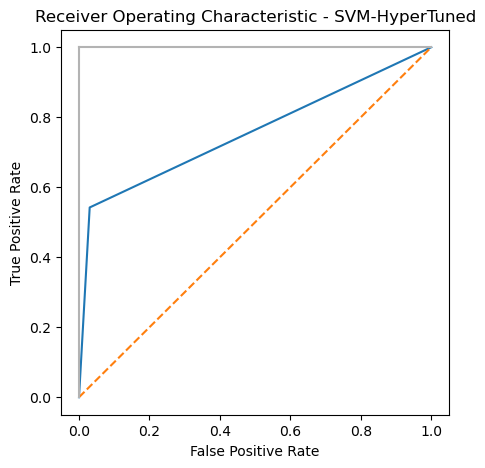

In [328]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - SVM-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [329]:
conclusion = pd.DataFrame({'ACTUAL':y_test,'PREDICTED':testpred})

In [330]:
conclusion

,ACTUAL,PREDICTED
293,1,0
400,0,0
177,0,0
574,1,1
693,1,1
...,...,...
277,1,1
875,1,0
564,1,0
893,0,0


In [331]:
pickle.dump(gs.best_estimator_,open('global_power_class.pkl','wb'))